# Рекомендательная система, построенная на 35 млн оценках от 60000 юзеров Кинопоиска

In [1]:
import numpy as np
import pandas as pd

# Загрузка базового датафрейма

In [2]:
df = pd.read_csv('votes.csv', sep='|')
df

,user_url,movie_url,movie_name,score,time
0,/user/15647798/,/film/568289/,Богемская рапсодия (2018),9,22.11.18 00:50
1,/user/15647798/,/film/435/,Зеленая миля (1999),8,22.11.18 00:51
2,/user/15647798/,/film/535341/,1+1 (2011),9,22.11.18 00:52
3,/user/15647798/,/film/389/,Леон (1994),8,22.11.18 00:52
4,/user/15647798/,/film/361/,Бойцовский клуб (1999),8,22.11.18 00:52
...,...,...,...,...,...
36464171,/user/1510864/,/series/161242/,Зена – королева воинов (1995),7,09.02.21 00:58
36464172,/user/1510864/,/series/95241/,Джуманджи (1996),6,09.02.21 00:59
36464173,/user/1510864/,/series/84961/,Люди в черном (1997),4,09.02.21 00:59
36464174,/user/1510864/,/series/817507/,Люк Кейдж (2016),4,09.02.21 00:59


Выкидываем ненужные(пока) столбцы

In [3]:
df.drop(columns=['time', 'movie_name'], inplace=True)

# Урезание датафрейма по числу просмотров(>=30)

In [6]:
counts = df.movie_url.value_counts()
counts

/film/447301/    36614
/film/535341/    34138
/film/258687/    33339
/film/361/       33163
/film/326/       32698
                 ...  
/film/925970/        1
/film/931164/        1
/film/453768/        1
/film/263381/        1
/film/927966/        1
Name: movie_url, Length: 217452, dtype: int64

Всего фильмов с больше чем 29 оценок:

In [7]:
count_threshold = 29
sum(counts > count_threshold)

43869

Обрезанный датафрейм:

In [8]:
clipped_df = df[df.movie_url.map(lambda x: counts[x] > count_threshold)]

In [14]:
clipped_df.head()

,user_url,movie_url,score
0,/user/15647798/,/film/568289/,9
1,/user/15647798/,/film/435/,8
2,/user/15647798/,/film/535341/,9
3,/user/15647798/,/film/389/,8
4,/user/15647798/,/film/361/,8


Сохранение обрезанного датафрейма:

In [13]:
clipped_df.to_csv(f'clipped{count_threshold}_df.csv', index=False, sep='|')

Сохранение соответствия url(фильма) - id(фильма) для обрезанного датафрейма в файл

In [15]:
movies_strs = set(clipped_df.movie_url)
m_id_dict = dict(zip(movies_strs, range(0, len(movies_strs))))
pd.DataFrame(m_id_dict.items(), columns=['movie_url', 'id']).to_csv('clipped_movies_ids.csv', sep='|', index=False)

Замена на айдишники в обрезанном датасете

In [16]:
clipped_df.movie_url = clipped_df.movie_url.map(m_id_dict)
clipped_df.user_url = clipped_df.user_url.map(u_id_dict)

/home/makuhich/.local/lib/python3.9/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [18]:
clipped_df.columns = ['user_id', 'movie_id', 'score']
clipped_df.head()

,user_id,movie_id,score
0,42090,5625,9
1,42090,33755,8
2,42090,26882,9
3,42090,40787,8
4,42090,39004,8


Сохранение обрезанного датасета с столбцами айдишниками

In [19]:
clipped_df.to_csv('clipped_short_votes_df.csv', sep='|', index=False)

# Замена на айдишники в полном фрейме

In [4]:
users_strs = set(df.user_url)
u_id_dict = dict(zip(users_strs, range(0, len(users_strs))))
pd.DataFrame(u_id_dict.items(), columns=['user_url', 'id']).to_csv('users_ids.csv', sep='|', index=False)

In [20]:
movies_strs = set(df.movie_url)
m_id_dict = dict(zip(movies_strs, range(0, len(movies_strs))))
pd.DataFrame(m_id_dict.items(), columns=['movie_url', 'id']).to_csv('movies_ids.csv', sep='|', index=False)

In [21]:
df.movie_url = df.movie_url.map(m_id_dict)
df.user_url = df.user_url.map(u_id_dict)

In [22]:
df.columns = ['user_id', 'movie_id', 'score']
df.head()

,user_id,movie_id,score
0,42090,61325,9
1,42090,204828,8
2,42090,196441,9
3,42090,104830,8
4,42090,157096,8


Сохранение полного датафрейма с столбцами айдишниками 

In [23]:
df.to_csv('short_votes.csv', sep='|', index=False)

# Загрузка обрезанного датафрейма с столбцами айдишниками(clipped_df)

In [1]:
import pandas as pd
import numpy as np

In [2]:
count_threshold = 29
clipped_df = pd.read_csv('clipped_short_votes_df.csv', sep='|')
clipped_df.head()

,user_id,movie_id,score
0,42090,5625,9
1,42090,33755,8
2,42090,26882,9
3,42090,40787,8
4,42090,39004,8


Приведение типов уменьшит размер фрейма в 4 раза:

In [3]:
clipped_df.movie_id = clipped_df.movie_id.astype('int32')
clipped_df.score = clipped_df.score.astype('int8')
clipped_df.user_id = clipped_df.user_id.astype('uint16')
clipped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35527548 entries, 0 to 35527547
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   uint16
 1   movie_id  int32 
 2   score     int8  
dtypes: int32(1), int8(1), uint16(1)
memory usage: 237.2 MB


# Получение Sparse матриц

### Повторная загрузка фрейма(для удобства)

In [1]:
import pandas as pd
import numpy as np
from scipy import sparse

In [2]:
count_threshold = 29
clipped_df = pd.read_csv(f'clipped_short_votes_df.csv', sep='|')
clipped_df.head()

,user_id,movie_id,score
0,42090,5625,9
1,42090,33755,8
2,42090,26882,9
3,42090,40787,8
4,42090,39004,8


In [3]:
clipped_df.movie_id = clipped_df.movie_id.astype('int32')
clipped_df.score = clipped_df.score.astype('int8')
clipped_df.user_id = clipped_df.user_id.astype('uint16')
clipped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35527548 entries, 0 to 35527547
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   uint16
 1   movie_id  int32 
 2   score     int8  
dtypes: int32(1), int8(1), uint16(1)
memory usage: 237.2 MB


### Получаем sparse-матрицу(юзер-фильм) оценок:

In [5]:
sp_M = sparse.csr_matrix((clipped_df['score'], (clipped_df['user_id'], clipped_df['movie_id'])), dtype='int8')
sp_M

<63011x43869 sparse matrix of type '<class 'numpy.int8'>'
	with 35527548 stored elements in Compressed Sparse Row format>

### Разбиваем на train-test
Разбиение происходит посредством зануления указанного процента ячеек в каждой строке(т.е. для каждого юзера)

In [3]:
from tqdm import tqdm

In [4]:
def train_test_split(ratings, alpha):
    test = sparse.csr_matrix(ratings.shape, dtype=ratings.dtype)
    train = ratings.copy()
    for user in tqdm(range(ratings.shape[0])):
        nonzero_ind = ratings[user].nonzero()[1]
        test_ratings = np.random.choice(nonzero_ind, 
                                        size=int(nonzero_ind.shape[0] * alpha), 
                                        replace=False)
        train[user, test_ratings] = 0
        test[user, test_ratings] = ratings[user, test_ratings]
        
    # Test and training are truly disjoint
    # assert(train.multiply(test).nonzero()) 
    return train, test

In [5]:
train, test = train_test_split(full_sp_M, 0.05)

  0%|          | 0/63011 [00:00<?, ?it/s]/home/makuhich/.local/lib/python3.9/site-packages/scipy/sparse/_index.py:116: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
100%|██████████| 63011/63011 [14:29<00:00, 72.46it/s] 


Проверка

In [13]:
train.multiply(test).nonzero()

(array([], dtype=int32), array([], dtype=int32))

### Сохранение всех трёх sparse-матриц

In [14]:
sparse.save_npz('train_sp_M.npz', train)
sparse.save_npz('test_sp_M.npz', test)
sparse.save_npz('full_sp_M.npz', sp_M)

# ALS Модель (Библиотека IMPLICIT)

In [1]:
from scipy import sparse
import numpy as np
import pandas as pd
import implicit

Загрузка матриц

In [2]:
train_sp_M = sparse.load_npz("train_sp_M.npz")
test_sp_M = sparse.load_npz("test_sp_M.npz")
full_sp_M = sparse.load_npz('full_sp_M.npz')

### Обучение моделей с разным числом факторов(5, 10, 15, ..., 115) (Только на train матрице)

In [4]:
import pickle
min_factors_number = 5
max_factors_number = 120
for i in range(min_factors_number, max_factors_number, 5):
    print(i)
    model = implicit.als.AlternatingLeastSquares(factors=i)
    model.fit(train_sp_M.T)
    with open(f'models_2/als_model_factors({i}).sav', 'wb') as f:
        pickle.dump(model, f)

5


  0%|          | 0/15 [00:00<?, ?it/s]

10


  0%|          | 0/15 [00:00<?, ?it/s]

15


  0%|          | 0/15 [00:00<?, ?it/s]

20


  0%|          | 0/15 [00:00<?, ?it/s]

25


  0%|          | 0/15 [00:00<?, ?it/s]

30


  0%|          | 0/15 [00:00<?, ?it/s]

35


  0%|          | 0/15 [00:00<?, ?it/s]

40


  0%|          | 0/15 [00:00<?, ?it/s]

45


  0%|          | 0/15 [00:00<?, ?it/s]

50


  0%|          | 0/15 [00:00<?, ?it/s]

55


  0%|          | 0/15 [00:00<?, ?it/s]

60


  0%|          | 0/15 [00:00<?, ?it/s]

65


  0%|          | 0/15 [00:00<?, ?it/s]

70


  0%|          | 0/15 [00:00<?, ?it/s]

75


  0%|          | 0/15 [00:00<?, ?it/s]

80


  0%|          | 0/15 [00:00<?, ?it/s]

85


  0%|          | 0/15 [00:00<?, ?it/s]

90


  0%|          | 0/15 [00:00<?, ?it/s]

95


  0%|          | 0/15 [00:00<?, ?it/s]

100


  0%|          | 0/15 [00:00<?, ?it/s]

105


  0%|          | 0/15 [00:00<?, ?it/s]

110


  0%|          | 0/15 [00:00<?, ?it/s]

115


  0%|          | 0/15 [00:00<?, ?it/s]

Модели сохранены в папку models_2

#### Время обучения:

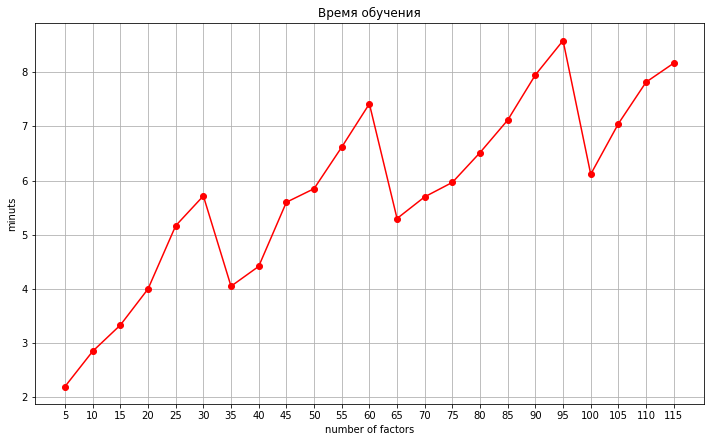

In [25]:
import matplotlib.pyplot as plt
s = '''5 15/15 [02:12<00:00, 8.97s/it]
10 15/15 [02:51<00:00, 10.00s/it]
15 15/15 [03:20<00:00, 13.02s/it]
20 15/15 [04:00<00:00, 17.20s/it]
25 15/15 [05:10<00:00, 19.87s/it]
30 15/15 [05:43<00:00, 22.11s/it]
35 15/15 [04:03<00:00, 15.65s/it]
40 15/15 [04:25<00:00, 16.77s/it]
45 15/15 [05:36<00:00, 22.58s/it]
50 15/15 [05:51<00:00, 22.41s/it]
55 15/15 [06:37<00:00, 25.40s/it]
60 15/15 [07:25<00:00, 30.42s/it]
65 15/15 [05:18<00:00, 20.84s/it]
70 15/15 [05:42<00:00, 23.65s/it]
75 15/15 [05:58<00:00, 22.72s/it]
80 15/15 [06:31<00:00, 24.71s/it]
85 15/15 [07:07<00:00, 28.01s/it]
90 15/15 [07:57<00:00, 31.28s/it]
95 15/15 [08:35<00:00, 34.09s/it]
100 15/15 [06:07<00:00, 23.54s/it]
105 15/15 [07:03<00:00, 27.51s/it]
110 15/15 [07:49<00:00, 32.44s/it]
115 15/15 [08:10<00:00, 32.44s/it]
'''
time_strs = [elem[:5] for elem in s.split('[')[1:]]
times = [int(elem[:2]) + int(elem[3:]) / 60 for elem in time_strs]
x = list(range(5, 120, 5))
plt.figure(figsize=(12, 7))
plt.grid()
plt.xticks(x)
plt.plot(x, times, 'r', marker='o')
plt.ylabel('minuts');
plt.xlabel('number of factors');
plt.title('Время обучения');

### Метрики

In [4]:
def calculate_hits_k(real, recommendations, k=10):
    '''
        precision at k (p @ k)
        real: list of tracks which user have listened
    '''
    try:
        return len(set(recommendations[:k]) & set(real))/ min(k, len(real))
    except ZeroDivisionError:
        return np.nan
    
def calculate_ndcg_k(real, recommendations, k=10):
    '''
        real: list of tracks which user have listened
    '''
    real_s = set(real)
    dcg = np.sum([i in real_s for i in recommendations]/ np.log2(np.arange(2, k + 2)))
    border = min(k, len(real_s))
    idcg = np.sum(np.ones(border)/ np.log2(np.arange(2, border + 2)))
    try:
        return dcg/idcg
    except ZeroDivisionError:
        return np.nan

In [5]:
from tqdm import tqdm

In [6]:
def calc_dataset_metric(metric_fun, test_set, pred_set, k=10):
    u_metrics = np.empty(test_set.shape[0], dtype='float64')
    for i in tqdm(range(test_set.shape[0])):
        u_metrics[i] = metric_fun(test_set[i].nonzero()[1], pred_set[i], k)
    return u_metrics, u_metrics[np.invert(np.isnan(u_metrics))].mean()
    

### Оценка моделей(по кол-ву факторов)

Расчет значений метрик

In [7]:
import pickle
k = 10
models_results = dict()
for i in range(75, 120, 5):
    print(i)
    with open(f'models_2/als_model_factors({i}).sav', 'rb') as f:
        model = pickle.load(f)
    predictions = model.recommend_all(train_sp_M, N=10, filter_already_liked_items=True)
    models_results[i] = [*calc_dataset_metric(calculate_hits_k, test_sp_M, predictions, k=k), *calc_dataset_metric(calculate_ndcg_k, test_sp_M, predictions, k=k)]
    print('hits:', models_results[i][1], 'ndcg:', models_results[i][3])
    np.save(f'models_2/metrics/hits_ndcg({i})', models_results[i])

75


  0%|          | 0/63011 [00:00<?, ?it/s]

  0%|          | 0/63011 [00:00<?, ?it/s]<ipython-input-4-d8971ca8fbe7>:19: RuntimeWarning: invalid value encountered in double_scalars
  return dcg/idcg
100%|██████████| 63011/63011 [00:15<00:00, 3982.54it/s]
/home/makuhich/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


hits: 0.23078962580936876 ndcg: 0.24289466112042354
80


  0%|          | 0/63011 [00:00<?, ?it/s]

100%|██████████| 63011/63011 [00:15<00:00, 3939.12it/s]


hits: 0.2334411139343361 ndcg: 0.24514827859311664
85


  0%|          | 0/63011 [00:00<?, ?it/s]

100%|██████████| 63011/63011 [00:15<00:00, 3962.78it/s]


hits: 0.2341114270101208 ndcg: 0.24570530201728633
90


  0%|          | 0/63011 [00:00<?, ?it/s]

100%|██████████| 63011/63011 [00:15<00:00, 3975.45it/s]


hits: 0.23522015838599947 ndcg: 0.24691598165361617
95


  0%|          | 0/63011 [00:00<?, ?it/s]

100%|██████████| 63011/63011 [00:15<00:00, 3968.36it/s]


hits: 0.2367623415363548 ndcg: 0.24813714471122716
100


  0%|          | 0/63011 [00:00<?, ?it/s]

100%|██████████| 63011/63011 [00:16<00:00, 3925.43it/s]


hits: 0.23793106994071228 ndcg: 0.2488366888944271
105


  0%|          | 0/63011 [00:00<?, ?it/s]

100%|██████████| 63011/63011 [00:15<00:00, 3940.17it/s]


hits: 0.23905480582004054 ndcg: 0.24980469602322308
110


  0%|          | 0/63011 [00:00<?, ?it/s]

100%|██████████| 63011/63011 [00:15<00:00, 3962.14it/s]


hits: 0.2401069607745206 ndcg: 0.2507484488736671
115


  0%|          | 0/63011 [00:00<?, ?it/s]

100%|██████████| 63011/63011 [00:16<00:00, 3924.93it/s]

hits: 0.24092764065970015 ndcg: 0.25183689306651824


Построение графика

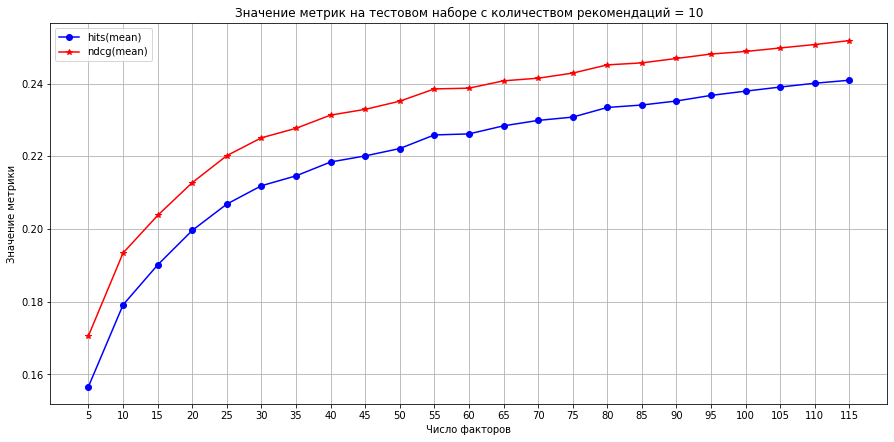

In [30]:
import matplotlib.pyplot as plt
metrics = dict()
x = list()
y = list()
y2 = list()
for i in range(5, 116, 5):
    metrics[i] = np.load(f'models_2/metrics/hits_ndcg({i}).npy', allow_pickle=True)
    x.append(i)
    y.append(metrics[i][1])
    y2.append(metrics[i][3])

plt.figure(figsize=(15, 7))
plt.plot(x, y, 'b', marker='o', label='hits(mean)')
plt.plot(x, y2, 'r', marker='*', label='ndcg(mean)')
plt.xticks(x)
plt.grid()
plt.legend()
plt.title('Значение метрик на тестовом наборе с количеством рекомендаций = 10')
plt.ylabel('Значение метрики')
plt.xlabel('Число факторов');

### Пример предсказаний

Загрузка словаря film id url

In [38]:
m_url_id_df = pd.read_csv('clipped_movies_ids.csv', sep='|')
m_id_url_dict = dict((id, url) for url, id in m_url_id_df.values)
def movie_id_to_url(movie_ids, m_id_url_dict):
    return [m_id_url_dict[elem] for elem in movie_ids]

Загрузка словаря user id url

In [39]:
u_url_id_df = pd.read_csv('users_ids.csv', sep='|')
u_id_url_dict = dict((id, url) for url, id in u_url_id_df.values)
def users_id_to_url(users_ids, u_id_url_dict):
    return [u_id_url_dict[elem] for elem in users_ids]

Загрузка лучшей модели (обученной на full_sp_M)

In [40]:
import pickle
with open('Models/als_model_factors(113).sav', 'rb') as f:
    model = pickle.load(f)

In [41]:
user_id = 0

user id to url

In [42]:
users_id_to_url([user_id], u_id_url_dict)

['/user/2393546/']

Рекомендация фильмов

In [43]:
movie_id_to_url([elem[0] for elem in model.recommend(user_id, train_sp_M, N=10, filter_already_liked_items=True)], m_id_url_dict)

['/film/6973/',
 '/film/24696/',
 '/film/711440/',
 '/series/1272477/',
 '/film/733784/',
 '/film/95452/',
 '/series/840995/',
 '/film/572299/',
 '/film/46543/',
 '/series/840346/']

# Объединичивание(по среднему). Заменяет оценку на 1, если оценка больше средней по юзеру, иначе -1

In [ ]:
from scipy import sparse
import numpy as np
import pandas as pd
import lightfm
from tqdm import tqdm

In [3]:
train_sp_M = sparse.load_npz("train_sp_M.npz")
test_sp_M = sparse.load_npz("test_sp_M.npz")
full_sp_M = sparse.load_npz('full_sp_M.npz')

Создание ones_matrix

In [3]:
def to_ones_matrix(sp_M, stat_fun):
    res_sp = sp_M.copy()
    for i in tqdm(range(sp_M.shape[0])):
        non_zero_inds = sp_M[i].nonzero()[1] # np.array
        if non_zero_inds.shape[0] != 0:
            user_stat = stat_fun(sp_M[i, non_zero_inds])
            more_or_eq_than_stat_mask = (sp_M[i, non_zero_inds] >= user_stat).toarray()[0] 
            more_or_eq_than_stat_inds = non_zero_inds[ more_or_eq_than_stat_mask ]
            less_than_stat_inds = non_zero_inds[ np.invert(more_or_eq_than_stat_mask) ]
            res_sp[i, less_than_stat_inds] = -1
            res_sp[i, more_or_eq_than_stat_inds] = 1
    return res_sp

In [4]:
ones_full_sp_M = to_ones_matrix(full_sp_M, lambda x: x.mean())

100%|██████████| 63011/63011 [02:22<00:00, 441.22it/s]


In [5]:
ones_train_sp_M = to_ones_matrix(train_sp_M, lambda x: x.mean())

100%|██████████| 63011/63011 [02:21<00:00, 444.20it/s]


In [6]:
ones_test_sp_M = to_ones_matrix(test_sp_M, lambda x: x.mean())

100%|██████████| 63011/63011 [01:31<00:00, 691.84it/s]


Сохранение объденичиных матриц

In [7]:
sparse.save_npz('ones_full_sp_M(mean).npz', ones_full_sp_M)
sparse.save_npz('ones_train_sp_M(mean).npz', ones_train_sp_M)
sparse.save_npz('ones_test_sp_M(mean).npz', ones_test_sp_M)

# Warp-Loss (библиотека LightFM)

In [1]:
from scipy import sparse
import numpy as np
import pandas as pd
import lightfm
from tqdm import tqdm

Загрузка матриц

In [2]:
ones_full_sp_M = sparse.load_npz('ones_full_sp_M(mean).npz')
ones_train_sp_M = sparse.load_npz('ones_train_sp_M(mean).npz')
ones_test_sp_M = sparse.load_npz('ones_test_sp_M(mean).npz')

In [3]:
train_sp_M = sparse.load_npz("train_sp_M.npz")
test_sp_M = sparse.load_npz("test_sp_M.npz")
full_sp_M = sparse.load_npz('full_sp_M.npz')

## Обучение моделей с разным числом факторов(5, 10, 15, ..., 115) (Только на train матрице)

In [3]:
import pickle
min_factors_number = 5
max_factors_number = 121
for i in range(min_factors_number, max_factors_number, 5):
    print(i)
    model = lightfm.LightFM(no_components=i, loss='warp')
    model.fit(ones_train_sp_M, num_threads=8, verbose=True, epochs=20)
    with open(f'models_3/warp_model_factors({i}).sav', 'wb') as f:
        pickle.dump(model, f)

5


Epoch: 100%|██████████| 20/20 [05:57<00:00, 17.86s/it]


10


Epoch: 100%|██████████| 20/20 [06:33<00:00, 19.65s/it]


15


Epoch: 100%|██████████| 20/20 [06:08<00:00, 18.41s/it]


20


Epoch: 100%|██████████| 20/20 [06:41<00:00, 20.09s/it]


25


Epoch: 100%|██████████| 20/20 [06:47<00:00, 20.35s/it]


30


Epoch: 100%|██████████| 20/20 [06:57<00:00, 20.86s/it]


35


Epoch: 100%|██████████| 20/20 [07:05<00:00, 21.28s/it]


40


Epoch: 100%|██████████| 20/20 [07:11<00:00, 21.59s/it]


45


Epoch: 100%|██████████| 20/20 [07:50<00:00, 23.54s/it]


50


Epoch: 100%|██████████| 20/20 [07:48<00:00, 23.41s/it]


55


Epoch: 100%|██████████| 20/20 [08:01<00:00, 24.08s/it]


60


Epoch: 100%|██████████| 20/20 [08:39<00:00, 26.00s/it]


65


Epoch: 100%|██████████| 20/20 [08:55<00:00, 26.79s/it]


70


Epoch: 100%|██████████| 20/20 [09:07<00:00, 27.38s/it]


75


Epoch: 100%|██████████| 20/20 [09:23<00:00, 28.16s/it]


80


Epoch: 100%|██████████| 20/20 [09:55<00:00, 29.76s/it]


85


Epoch: 100%|██████████| 20/20 [10:06<00:00, 30.35s/it]


90


Epoch: 100%|██████████| 20/20 [10:18<00:00, 30.93s/it]


95


Epoch: 100%|██████████| 20/20 [10:24<00:00, 31.24s/it]


100


Epoch: 100%|██████████| 20/20 [10:51<00:00, 32.55s/it]


105


Epoch: 100%|██████████| 20/20 [10:54<00:00, 32.74s/it]


110


Epoch: 100%|██████████| 20/20 [11:19<00:00, 33.98s/it]


115


Epoch: 100%|██████████| 20/20 [11:24<00:00, 34.23s/it]


120


Epoch: 100%|██████████| 20/20 [11:36<00:00, 34.84s/it]


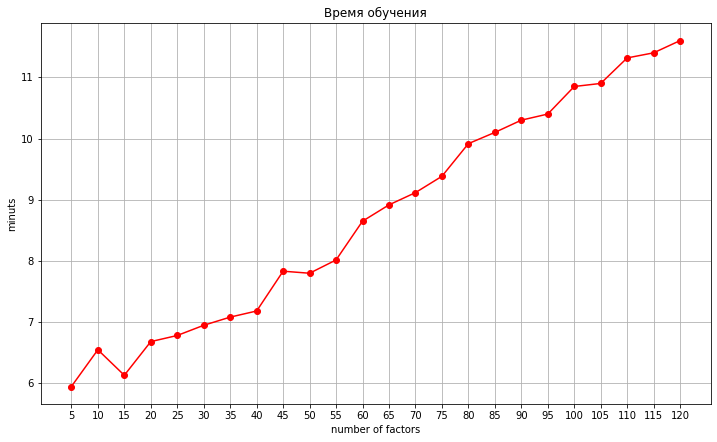

In [9]:
s='''5
Epoch: 100%|██████████| 20/20 [05:57<00:00, 17.86s/it]
10
Epoch: 100%|██████████| 20/20 [06:33<00:00, 19.65s/it]
15
Epoch: 100%|██████████| 20/20 [06:08<00:00, 18.41s/it]
20
Epoch: 100%|██████████| 20/20 [06:41<00:00, 20.09s/it]
25
Epoch: 100%|██████████| 20/20 [06:47<00:00, 20.35s/it]
30
Epoch: 100%|██████████| 20/20 [06:57<00:00, 20.86s/it]
35
Epoch: 100%|██████████| 20/20 [07:05<00:00, 21.28s/it]
40
Epoch: 100%|██████████| 20/20 [07:11<00:00, 21.59s/it]
45
Epoch: 100%|██████████| 20/20 [07:50<00:00, 23.54s/it]
50
Epoch: 100%|██████████| 20/20 [07:48<00:00, 23.41s/it]
55
Epoch: 100%|██████████| 20/20 [08:01<00:00, 24.08s/it]
60
Epoch: 100%|██████████| 20/20 [08:39<00:00, 26.00s/it]
65
Epoch: 100%|██████████| 20/20 [08:55<00:00, 26.79s/it]
70
Epoch: 100%|██████████| 20/20 [09:07<00:00, 27.38s/it]
75
Epoch: 100%|██████████| 20/20 [09:23<00:00, 28.16s/it]
80
Epoch: 100%|██████████| 20/20 [09:55<00:00, 29.76s/it]
85
Epoch: 100%|██████████| 20/20 [10:06<00:00, 30.35s/it]
90
Epoch: 100%|██████████| 20/20 [10:18<00:00, 30.93s/it]
95
Epoch: 100%|██████████| 20/20 [10:24<00:00, 31.24s/it]
100
Epoch: 100%|██████████| 20/20 [10:51<00:00, 32.55s/it]
105
Epoch: 100%|██████████| 20/20 [10:54<00:00, 32.74s/it]
110
Epoch: 100%|██████████| 20/20 [11:19<00:00, 33.98s/it]
115
Epoch: 100%|██████████| 20/20 [11:24<00:00, 34.23s/it]
120
Epoch: 100%|██████████| 20/20 [11:36<00:00, 34.84s/it]
'''
import matplotlib.pyplot as plt
time_strs = [elem[:5] for elem in s.split('[')[1:]]
times = [int(elem[:2]) + int(elem[3:]) / 60 for elem in time_strs]
x = list(range(5, 121, 5))
plt.figure(figsize=(12, 7))
plt.grid()
plt.xticks(x)
plt.plot(x, times, 'r', marker='o')
plt.ylabel('minuts');
plt.xlabel('number of factors');
plt.title('Время обучения');

Оценка

In [32]:
def get_predicitons(model, N, num_threads=1):
    res = np.empty((ones_train_sp_M.shape[0], N), dtype='int32')
    for i in tqdm(range(ones_train_sp_M.shape[0])):
        scores = model.predict(i, np.arange(ones_train_sp_M.shape[1]), num_threads=num_threads)
        res[i] = np.argsort(-scores)[:N]
    return res


In [9]:
import pickle
k = 10
models_results = dict()
for i in range(5, 116, 5):
    print(i)
    with open(f'models_3/warp_model_factors({i}).sav', 'rb') as f:
        model = pickle.load(f)
    predictions = get_predicitons(model, k, 8)
    models_results[i] = [*calc_dataset_metric(calculate_hits_k, test_sp_M, predictions, k=k), *calc_dataset_metric(calculate_ndcg_k, test_sp_M, predictions, k=k)]
    print('hits:', models_results[i][1], 'ndcg:', models_results[i][3])
    np.save(f'models_3/metrics/hits_ndcg({i})', models_results[i])
    np.save(f'models_3/metrics/{k}predictions{i}', predictions)

  0%|          | 8/63011 [00:00<13:22, 78.48it/s]

5


  0%|          | 0/63011 [00:00<?, ?it/s]<ipython-input-4-dcabd1360f17>:20: RuntimeWarning: invalid value encountered in double_scalars
  return dcg/idcg
100%|██████████| 63011/63011 [00:15<00:00, 4106.21it/s]
/home/makuhich/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
  0%|          | 14/63011 [00:00<07:44, 135.60it/s]

hits: 0.041327299074659325 ndcg: 0.03731339697703681
10


  0%|          | 13/63011 [00:00<08:17, 126.63it/s]

hits: 0.04352720410909344 ndcg: 0.03914792655466591
15


  0%|          | 13/63011 [00:00<08:14, 127.52it/s]

hits: 0.04418374382017316 ndcg: 0.039910934870509895
20


  0%|          | 12/63011 [00:00<08:46, 119.67it/s]

hits: 0.045427781541145074 ndcg: 0.04071979672946343
25


  0%|          | 12/63011 [00:00<08:48, 119.24it/s]

hits: 0.045391420977540946 ndcg: 0.04070001721162617
30


  0%|          | 11/63011 [00:00<09:49, 106.84it/s]

hits: 0.0457592726432297 ndcg: 0.0407061034936599
35


  0%|          | 12/63011 [00:00<09:11, 114.13it/s]

hits: 0.04573285912107326 ndcg: 0.0407917673271521
40


  0%|          | 11/63011 [00:00<09:50, 106.65it/s]

hits: 0.04582497068350865 ndcg: 0.04082152312110981
45


  0%|          | 11/63011 [00:00<10:02, 104.64it/s]

hits: 0.04608884708613242 ndcg: 0.04128011189810617
50


  0%|          | 11/63011 [00:00<09:41, 108.31it/s]

hits: 0.046517842977766476 ndcg: 0.04121922853222336
55


  0%|          | 11/63011 [00:00<09:58, 105.21it/s]

hits: 0.04644438036926887 ndcg: 0.04139991173099567
60


  0%|          | 13/63011 [00:00<08:20, 125.83it/s]

hits: 0.04672985766077484 ndcg: 0.04155360698659794
65


  0%|          | 10/63011 [00:00<10:32, 99.53it/s]

hits: 0.047041251821875484 ndcg: 0.04174462820909854
70


  0%|          | 12/63011 [00:00<08:51, 118.64it/s]

hits: 0.04631695750920486 ndcg: 0.04100641927625076
75


  0%|          | 12/63011 [00:00<08:48, 119.28it/s]

hits: 0.04671220201196051 ndcg: 0.04156042167468052
80


  0%|          | 12/63011 [00:00<09:11, 114.14it/s]

hits: 0.046847263528326126 ndcg: 0.04154077537370601
85


  0%|          | 11/63011 [00:00<09:38, 108.89it/s]

hits: 0.04723000777576039 ndcg: 0.041509691595258885
90


  0%|          | 0/63011 [00:00<?, ?it/s]

hits: 0.04660232287900676 ndcg: 0.04151046464294778
95


 47%|████▋     | 29805/63011 [04:29<04:59, 110.71it/s]


KeyboardInterrupt: 

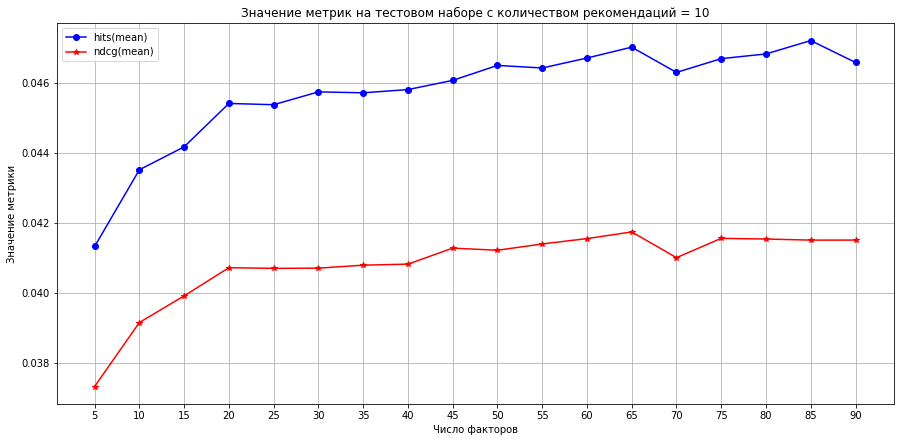

In [31]:
import matplotlib.pyplot as plt
metrics = dict()
x = list()
y = list()
y2 = list()
for i in range(5, 95, 5):
    metrics[i] = np.load(f'models_3/metrics/hits_ndcg({i}).npy', allow_pickle=True)
    x.append(i)
    y.append(metrics[i][1])
    y2.append(metrics[i][3])

plt.figure(figsize=(15, 7))
plt.plot(x, y, 'b', marker='o', label='hits(mean)')
plt.plot(x, y2, 'r', marker='*', label='ndcg(mean)')
plt.xticks(x)
plt.grid()
plt.legend()
plt.title('Значение метрик на тестовом наборе с количеством рекомендаций = 10')
plt.ylabel('Значение метрики')
plt.xlabel('Число факторов');

In [16]:
from lightfm.evaluation import precision_at_k

In [33]:
import pickle
with open(f'models_3/warp_model_factors(115).sav', 'rb') as f:
    model = pickle.load(f)

In [23]:
positive_ones_test_sp_M = ones_test_sp_M.multiply(ones_test_sp_M > 0)

In [34]:
%%time
res = precision_at_k(model, positive_ones_test_sp_M, num_threads=8)

CPU times: user 10min 14s, sys: 420 ms, total: 10min 14s
Wall time: 1min 19s


In [30]:
res.mean()

0.031471517

Рекомендации

In [35]:
m_url_id_df = pd.read_csv('clipped_movies_ids.csv', sep='|')
m_id_url_dict = dict((id, url) for url, id in m_url_id_df.values)
def movie_id_to_url(movie_ids, m_id_url_dict):
    return [m_id_url_dict[elem] for elem in movie_ids]

In [36]:
u_url_id_df = pd.read_csv('users_ids.csv', sep='|')
u_id_url_dict = dict((id, url) for url, id in u_url_id_df.values)
def users_id_to_url(users_ids, u_id_url_dict):
    return [u_id_url_dict[elem] for elem in users_ids]

In [37]:
import pickle
with open(f'models_3/warp_model_factors(115).sav', 'rb') as f:
    model = pickle.load(f)

In [40]:
user_id = 1

In [41]:
users_id_to_url([user_id], u_id_url_dict)

['/user/5899266/']

In [45]:
[m_id_url_dict[elem] for elem in model.predict(user_id, np.arange(ones_train_sp_M.shape[1])).argsort()[:10]]

['/film/29416/',
 '/film/160343/',
 '/film/50802/',
 '/film/102652/',
 '/film/392220/',
 '/film/126508/',
 '/film/50158/',
 '/film/175045/',
 '/film/83622/',
 '/film/103347/']